In [14]:
%matplotlib inline

import sys
for m in list(sys.modules.keys()):
    if m.startswith("am.") or m in ["cnn_runner", "config", "cnn_builder", "classify_feats", "dr_methods", "voi_methods"]:
        del(sys.modules[m])
import am.main as appr

In [5]:
for m in list(sys.modules.keys()):
    if m in ["config", "data_retrieval", "preprocessing", "model", "classify_feats"]:
        del(sys.modules[m])

In [10]:
A = appr.Apprentice()
import config
config.config_A(A)

In [13]:
A("get matching actions")("model")
#A("show action arguments")("load csv")

No matches


# Preprocessing

In [73]:
#A("for all lesion classes")("convert dcm to nii")
#A("for all lesion classes")("convert dcm to npy")
#A("for all lesion classes")("convert nii to npy")
#A("convert dcm to nii")(cls="hcc")

In [ ]:
#A("visualize dcm")()
#A("visualize nii")()
A("visualize npy")()

In [ ]:
A("crop images around lesions")()

In [ ]:
A("visualize lesion")()

In [ ]:
raw_df = A("get raw input df")()
accnum_df = A("get accnum df")()
lesion_df = A("get lesion df")()

In [ ]:
A("tighten crops")()

In [ ]:
A("augment lesion images")()

In [ ]:
A("show lesion")()

## Figures

In [ ]:
A("export lesions to png")(separate_by_cls=True)

In [ ]:
A("draw lesions with bounding boxes")()

# Read Run Stats

In [64]:
df = A("get run stats")()

In [ ]:
df = df.dropna(subset=['miscls_test'])
df = df.loc[:,['miscls_test','miscls_train']] #df.model_num.str.startswith('fixZ-ens')
#df = df.dropna()
#b = a.iloc[0]['y_pred_raw']
#b = hf.str_to_lists(b)

mis_test = df['miscls_test'].values
#mis_test += df['miscls_train'].values

mis_test = ''.join(mis_test)
mis_test = mis_test.replace(' ','')
mis_test = mis_test.replace("'","")
mis_test = re.sub(r'\]\[', ',', mis_test)
mis_test = mis_test.replace("[","")
mis_test = mis_test.replace("]","")

mis_test = mis_test.split(',')

unique, counts = np.unique(mis_test, return_counts=True)

x = dict(zip(unique, counts))

sorted_x = sorted(x.items(), key=operator.itemgetter(1), reverse=True)
for x,y in sorted_x:
    print(x,y)

In [28]:
mis_test = df['miscls_train'].values
mis_test = ''.join(mis_test)
mis_test = mis_test.replace(' ','')
mis_test = mis_test.replace("'","")
mis_test = mis_test.split(']')

In [58]:
mis_test = df['misclassified_train'].values

T = []
for ix in range(len(mis_test)-1):
    T.append((mis_test[ix].count(',')+1))

In [ ]:
for z in sorted_x:
    print(z[0],'\t',z[1])

In [18]:
vm.save_vois_as_imgs(lesion_ids=[k for k in x if x[k]>2 and k!=""], save_dir="Z:\\Paula\\Misclassifications", separate_by_cls=True, normalize=[-1,1])

df = pd.read_csv(C.run_stats_path)
df = df[(df['test_num'] == 10) & (~df['time_dist']) & (df['steps_per_epoch'] == 750) & (df['timestamp'] < 1515879326)]

In [68]:
df = pd.read_csv(C.run_stats_path)
df = df[(df['hcc'] == 141) & (df['clinical_inputs'] == 2) & (df['steps_per_epoch']>100)]
#df = df[~df.model_num.str.startswith('fixZ-ens')]

In [56]:
df.acc6cls.mean(), df.acc3cls.mean()

(0.7316666666666667, 0.7316666666666667)

In [79]:
train_acc = [1-x.count("_")/434 for x in df['miscls_train'].values] #434

In [ ]:
[print("%.1f%%"%(x*100)) for x in (np.mean(df.acc6cls), np.std(df.acc6cls), df.acc3cls.mean(), df.acc3cls.std())]

In [ ]:
cms = df['confusion_matrix'].values
cms = ''.join(cms)

supercm = hf.str_to_lists(cms, dtype=int)
supercm = [supercm[rownum:rownum+C.nb_classes] for rownum in range(0,len(supercm),C.nb_classes)]
supercm = np.array(supercm)

cm_sum = np.empty((C.nb_classes,C.nb_classes), int)

for i in range(C.nb_classes):
    for j in range(C.nb_classes):
        cm_sum[i,j] = np.sum(supercm[:,i,j])

for i in range(C.nb_classes):
    for j in range(C.nb_classes):
        print(cm_sum[j,i],end='\t')
    print()

In [112]:
np.sum(cm_sum[0,:])

150.0

In [29]:
avg_tpr = cm_sum[0,0]/np.sum(cm_sum[0,:])
avg_fpr = np.sum(cm_sum[1:,0])/np.sum(cm_sum[1:,:])

In [30]:
fpr = [np.sum(cm[1:,0])/np.sum(cm[1:,:]) for cm in supercm]
tpr = [cm[0,0]/np.sum(cm[0,:]) for cm in supercm]

In [33]:
importlib.reload(hf)
truths = df['y_true'].values
truths = ''.join(truths)
truths = hf.str_to_lists(truths, dtype=int)
truths = np.array(truths)
test_num = truths.shape[1]

predictions = df['y_pred_raw'].values
predictions = ''.join(predictions)
predictions = hf.str_to_lists(predictions, dtype=float)
predictions = [predictions[rownum:rownum+test_num] for rownum in range(0,len(predictions),test_num)]
predictions = np.array(predictions)

hcc_thresh = []
nonhcc_thresh = []
thresh_dict = {}

for run_num in range(len(df)):
    for lesion_num in range(test_num):
        if truths[run_num, lesion_num] == C.cls_names.index('hcc'):
            hcc_thresh.append(predictions[run_num, lesion_num, 0])
            if predictions[run_num, lesion_num, 0] in thresh_dict:
                thresh_dict[predictions[run_num, lesion_num, 0]+random.random()*1e-5] = 'hcc'
            else:
                thresh_dict[predictions[run_num, lesion_num, 0]] = 'hcc'
        else:
            nonhcc_thresh.append(predictions[run_num, lesion_num, 0])
            if predictions[run_num, lesion_num, 0] in thresh_dict:
                thresh_dict[predictions[run_num, lesion_num, 0]+random.random()*1e-5] = 'non-hcc'
            else:
                thresh_dict[predictions[run_num, lesion_num, 0]] = 'non-hcc'

In [37]:
len(thresh_dict)

300

In [38]:
minT = [1,1] #minT=[.68,.99]

true = 50#len(thresh_dict)//2
false = 300-50#len(thresh_dict)//2
TPR = [true/true]
FPR = [false/false]
a=0
hcc_correct = 50#len(thresh_dict)//2
hcc_wrong = 300-50#len(thresh_dict)//2
for key in sorted(thresh_dict):
    if key > minT[1]:
        break
    if key > minT[0]:
        a+=1
        if thresh_dict[key] != 'hcc':
            hcc_wrong -= 1
    elif thresh_dict[key] == 'hcc':
        hcc_correct -= 1
    else:
        hcc_wrong -= 1
    TPR.append(hcc_correct/true)
    FPR.append(hcc_wrong/false)

In [39]:
R = (1-FPR[-1], TPR[-1])
R

(1.0, 0.0)

In [186]:
a/len(thresh_dict)

0.6206666666666667

In [180]:
hcc_fpos_cost = 12000
hcc_miss_cost = 5000
biopsy_cost = 1400

In [81]:
nonhcc_thresh = np.array(nonhcc_thresh)
hcc_thresh = np.array(hcc_thresh)
all_thresh = np.array(list(thresh_dict.keys()))

In [178]:
(hcc_thresh < minT[0]).sum()

11

In [183]:
(nonhcc_thresh > minT[1]).sum()

0

In [200]:
true_spec = (nonhcc_thresh < minT[0]).sum() / (750 - ((nonhcc_thresh < minT[1]) & (nonhcc_thresh > minT[0])).sum())
true_sens = (hcc_thresh > minT[1]).sum() / (750 - ((hcc_thresh < minT[1]) & (hcc_thresh > minT[0])).sum())
true_spec, true_sens

(1.0, 0.0)

In [155]:
fun = lambda T: hcc_fpos_cost * (nonhcc_thresh > T[1]).sum() + hcc_miss_cost * (hcc_thresh < T[0]).sum() + \
        biopsy_cost * ((all_thresh < T[1]) & (all_thresh > T[0])).sum()

In [165]:
import math

In [198]:
minC=1e10
for T1 in np.linspace(0,1,100,False):
    for T2 in np.linspace(T1,1,(1-T1)*100+1):
        C = fun([T1,T2])
        if minC > C:
            minC = C
            minT = [T1,T2]

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
rates05, (avg_fpr, avg_tpr), rates95

((0.25066666666666665, 0.9786666666666667),
 (0.18, 0.9266666666666666),
 (0.12533333333333332, 0.7893333333333333))

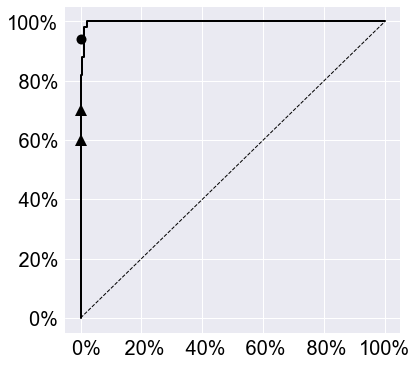

In [41]:
plt.style.use('seaborn')
fig, ax = plt.subplots(1,1,figsize=(6, 6))
ax.plot(FPR, TPR, 'k', label='Model', linewidth=2)
#ax.plot(.04, 1, 'ko', label='ModelReader', markersize=12)
ax.plot(0, .7, 'k^', label='RAD2', markersize=12)
ax.plot(0, .6, 'k ^', label='RAD1', markersize=12)
ax.plot(avg_fpr, avg_tpr, 'ko', label='ModelAvg', markersize=10)
#ax.plot(rates10[0], rates10[1], 'ko', label='10%', markersize=10)
#ax.plot(rates95[0], rates95[1], 'ko', label='90%', markersize=10)
#ax.plot(rates05[0], rates05[1], 'ko', label='5%', markersize=10)
#ax.plot(rates98[0], rates98[1], 'ko', label='95%', markersize=10)
#ax.plot(fpr, tpr, 'o', ms=5)
ax.plot([0,1], [0,1], 'k--', lw=1)
vals = ax.get_xticks()
ax.set_xticklabels(['{:3.0f}%'.format(x*100) for x in vals], size=20, color='k')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals], size=20, color='k')

#ax.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
#ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))

In [56]:
sp.plot(FPR, TPR, 'k', label='Model', linewidth=3)
sp.plot(.1, .9, 'g^', label='Model', markersize=10)
sp.plot(.43, 1., 'r^', label='R2', markersize=10)
sp.plot(.67, 1., 'b^', label='R1', markersize=10)

In [ ]:
AUC = sum([(FPR[i]-FPR[i+1])*TPR[i] for i in range(len(FPR)-1)])
AUC

a = run_stats.loc[:,['y_true','y_pred_raw']]
a = a.dropna()
b = a.iloc[0]['y_pred_raw']
b = hf.str_to_lists(b)